# Fitting a line to Poisson data

In [1]:
%matplotlib inline
import oktopus
from oktopus import UniformPrior, PoissonPosterior, PoissonLikelihood
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'size'   : 18,
        'serif'  : 'New Century Schoolbook'}
rc('font', **font)

In [2]:
x = np.linspace(0, 5, 100)
def mean(m, b):
    return x * m + b
poisson_data = np.random.poisson(mean(2, 10))

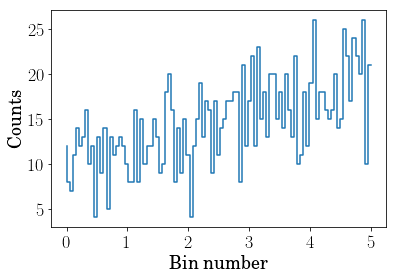

In [3]:
pl.step(x, poisson_data)
pl.ylabel("Counts")
pl.xlabel("Bin number")

In [4]:
unif_prior = UniformPrior(lb=[0.5, 4], ub=[4, 16])

In [5]:
poisson_posterior = PoissonPosterior(poisson_data, mean, unif_prior)
poisson_likelihood = PoissonLikelihood(poisson_data, mean)

In [6]:
result_posterior = poisson_posterior.fit(x0=(1.5, 11))
result_posterior

 final_simplex: (array([[ 1.92604805,  9.77487277],
       [ 1.92607622,  9.77480278],
       [ 1.92607876,  9.77484013]]), array([-2475.59161988, -2475.59161987, -2475.59161987]))
           fun: -2475.591619875926
       message: 'Optimization terminated successfully.'
          nfev: 66
           nit: 34
        status: 0
       success: True
             x: array([ 1.92604805,  9.77487277])

In [7]:
result_likelihood = poisson_likelihood.fit(x0=(1.5, 11))
result_likelihood

 final_simplex: (array([[ 1.92604805,  9.77487277],
       [ 1.92607622,  9.77480278],
       [ 1.92607876,  9.77484013]]), array([-2479.32928949, -2479.32928949, -2479.32928949]))
           fun: -2479.3292894942092
       message: 'Optimization terminated successfully.'
          nfev: 66
           nit: 34
        status: 0
       success: True
             x: array([ 1.92604805,  9.77487277])

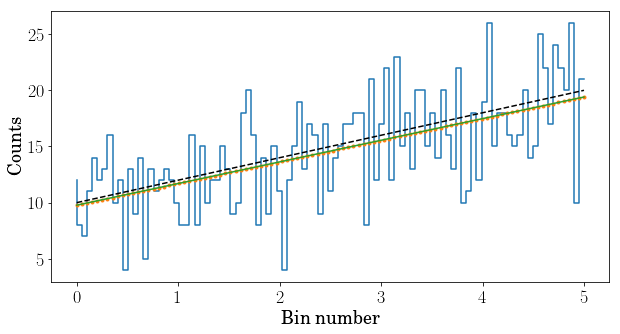

In [8]:
pl.figure(figsize=[10, 5])
pl.step(x, poisson_data)
pl.plot(x, mean(*result_posterior.x), '.')
pl.plot(x, mean(*result_likelihood.x))
pl.plot(x, mean(2, 10), 'k--')
pl.ylabel("Counts")
pl.xlabel("Bin number")

In [9]:
import emcee
ndim, nwalkers = 2, 100
p0 = [result_posterior.x + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [10]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lambda params: - poisson_posterior.evaluate(params))
_ = sampler.run_mcmc(p0, 1000)

In [11]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
samples.shape

(95000, 2)

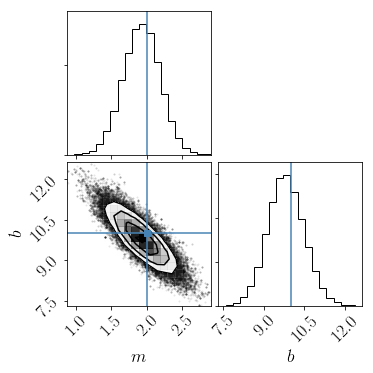

In [12]:
import corner
fig = corner.corner(samples, labels=["$m$", "$b$"],
                    truths=[2, 10])

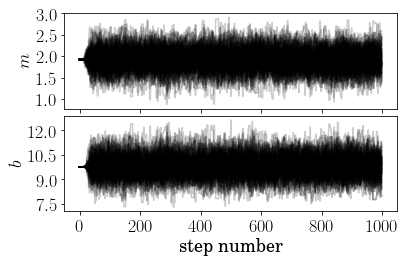

In [13]:
from matplotlib.ticker import MaxNLocator
label = [r"$m$", r"$b$"]

fig, axes = pl.subplots(2, 1, sharex=True)
for i in range(0, 2, 1):
    axes[i].plot(sampler.chain[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[1].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

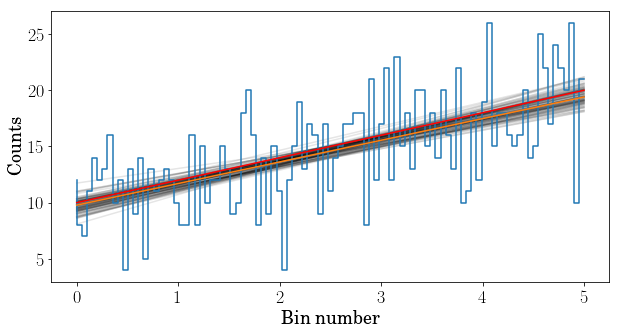

In [14]:
pl.figure(figsize=[10, 5])
xl = np.array([0, 5])
for m, b in samples[np.random.randint(len(samples), size=100)]:
    pl.plot(xl, m*xl+b, color="k", alpha=0.1)
pl.step(x, poisson_data)
pl.plot(x, mean(*result_posterior.x), '-')
pl.plot(x, mean(2, 10), 'r-')
pl.ylabel("Counts")
pl.xlabel("Bin number")